In [55]:
import numpy as np
from pathlib import Path
import pandas as pd
from PIL import Image

p_fake = Path('data/images_new/fake')
list_name_img_fake = []
list_var_arr_fake = []
for x in p_fake.glob('*'):
    x_rprefix = str(x).removeprefix('data\\images_new\\fake\\')
    list_name_img_fake.append(x_rprefix)
    img = Image.open(x)
    img_resize = img.resize((32, 32))
    list_var_arr_fake.append(np.array(img_resize) / 255.0)
list_fake_img_df = pd.DataFrame({'id': list_name_img_fake, 'val_arr': list_var_arr_fake, 'label': 1.0})

p_real = Path('data/images_new/real')
list_name_img_real = []
list_var_arr_real = []
for x in p_real.glob('*'):
    x_rprefix = str(x).removeprefix('data\\images_new\\real\\')
    list_name_img_real.append(x_rprefix)
    img = Image.open(x)
    img_resize = img.resize((32, 32))
    list_var_arr_real.append(np.array(img_resize) / 255.0)
list_real_img_df = pd.DataFrame({'id': list_name_img_real, 'val_arr': list_var_arr_real, 'label': 0.0})

list_fake_img_df.head(), list_real_img_df.head()

(                                                  id  \
 0  -how-important-people-from-the-past-really-loo...   
 1  -s-fluffy-fur-and-round-features-immediately-m...   
 2  -using-generative-ai-technology-landscape-patt...   
 3  -yellow-kimono-with-a-golden-crown-and-a-very-...   
 4  .amazonaws.com2Fpublic2Fimages2Ff89de3bb-279b-...   
 
                                              val_arr  label  
 0  [[[0.19607843137254902, 0.17254901960784313, 0...    1.0  
 1  [[[0.11372549019607843, 0.1450980392156863, 0....    1.0  
 2  [[[0.023529411764705882, 0.0196078431372549, 0...    1.0  
 3  [[[0.0196078431372549, 0.03137254901960784, 0....    1.0  
 4  [[[0.2, 0.34901960784313724, 0.396078431372549...    1.0  ,
                                                   id  \
 0  -man-sits-with-a-woman-on-her-phone-at-a-table...   
 1  -Skills-Promo-A-Total-Artist-All-of-North-West...   
 2  .amazonaws.com2Fpublic2Fimages2Fcb32a00a-bf52-...   
 3                                           0182

In [56]:
list_img_df = pd.concat([list_fake_img_df, list_real_img_df])
list_img_df = list_img_df.sample(frac=1).reset_index(drop=True)
list_img_df.shape

(3016, 3)

In [57]:
import input_and_processing as iap
num_train = 2500

all_images = list_img_df['val_arr'].to_numpy()
train_images = all_images[:num_train]
test_images = all_images[num_train:]

all_labels = list_img_df['label'].to_numpy()
train_labels = all_labels[:num_train]
test_labels = all_labels[num_train:]

(_, _), (_, _), t_img, _ = iap.my_input_and_processing()

In [58]:
train_images[212].shape

(32, 32, 3)

In [59]:
train_img = np.zeros([train_images.shape[0], train_images[0].shape[0], train_images[0].shape[1], train_images[0].shape[2] + 1], dtype=np.float32)

for i in range(train_images.shape[0]):
    if train_images[i].shape == (32, 32):
        train_img[i, :, :, 0] = train_images[i]
    elif train_images[i].shape[2] == 3:
        train_img[i, :, :, :3] = train_images[i]
    else:
        train_img[i, :, :, :4] = train_images[i]

In [60]:
test_img = np.zeros([test_images.shape[0], test_images[0].shape[0], test_images[0].shape[1], test_images[0].shape[2] + 1], dtype=np.float32)

for i in range(test_images.shape[0]):
    if test_images[i].shape == (32, 32):
        test_img[i, :, :, 0] = test_images[i]
    elif test_images[i].shape[2] == 3:
        test_img[i, :, :, :3] = test_images[i]
    else:
        test_img[i, :, :, :4] = test_images[i]

Обучение модели CNN

In [77]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 4)),
    keras.layers.MaxPooling2D((2, 2)),
    # keras.layers.Dropout(0.5),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),
    # keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # keras.layers.MaxPooling2D((2, 2)),
    # keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_crossentropy'])

history = model.fit(train_img, train_labels, epochs=50, validation_data=(test_img, test_labels))

test_loss, test_acc = model.evaluate(test_img, test_labels)
print('Test metric:', test_acc)

predictions = model.predict(t_img)

c:\mArt\dataScience\kaggle\attempt_at_writing\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.7083 - sparse_categorical_crossentropy: 0.7083 - val_loss: 0.6874 - val_sparse_categorical_crossentropy: 0.6869
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6885 - sparse_categorical_crossentropy: 0.6886 - val_loss: 0.6818 - val_sparse_categorical_crossentropy: 0.6817
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6840 - sparse_categorical_crossentropy: 0.6839 - val_loss: 0.6834 - val_sparse_categorical_crossentropy: 0.6827
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6782 - sparse_categorical_crossentropy: 0.6782 - val_loss: 0.6844 - val_sparse_categorical_crossentropy: 0.6848
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6687 - sparse_categorical_crossentropy: 0.6687 - val_loss: 0.6741 - val_sparse_categorical_crossentropy: 0.6736
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6779 - sparse_categorical_crossentropy: 0.6779 - val_loss: 0.6871 - val_sp

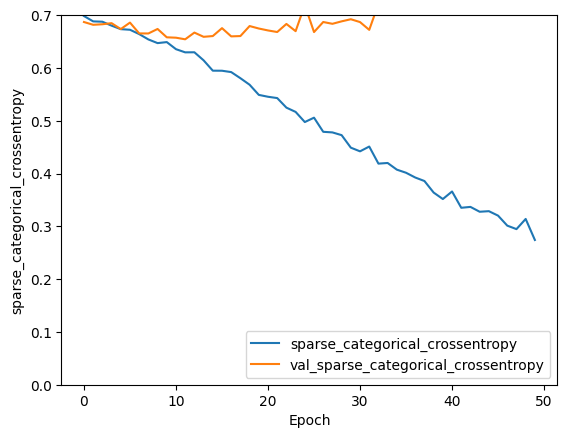

In [78]:
import matplotlib.pyplot as plt
plt.plot(history.history['sparse_categorical_crossentropy'], label='sparse_categorical_crossentropy')
plt.plot(history.history['val_sparse_categorical_crossentropy'], label = 'val_sparse_categorical_crossentropy')
plt.xlabel('Epoch')
plt.ylabel('sparse_categorical_crossentropy')
plt.ylim([0, 0.7])
plt.legend(loc='lower right')